In [66]:
import math
import numpy as np


In [67]:
def f(theta, l1, l2):
    x = [-1, -1]
    # The following are switched from the original sketches for convenience
    x[1] =  l1*math.sin(theta[0]) + l2*math.sin(theta[0]+theta[1])
    x[0] = l1*math.cos(theta[0]) + l2*math.cos(theta[0]+theta[1])
    
    return x

def finv(x, l1, l2):
    d = math.sqrt(x[0]**2 + x[1]**2)
    
    a = (l1**2 - l2**2 + d**2)/(2*d)
    
    h = math.sqrt(l1**2 - a**2)
    
    theta = [-1, -1]
    theta[0] = math.atan(x[1]/x[0]) + math.atan(h/a)
    midx = math.cos(theta[0])*l1
    midy = math.sin(theta[0])*l1
    remx = x[0] - midx
    remy = x[1] - midy
    
    theta[1] = math.atan(remy/remx) - theta[0]
    
    return theta

In [68]:
theta = finv([0.001, 7.999], 4, 4)

print(theta[0]*(360/(2*math.pi)))
print(theta[1]*(360/(2*math.pi)))

90.89874407206504
-1.8118138796506853


In [89]:
def gradf(theta, l1, l2):
    grad_out = [[-1, -1], [-1, -1]] # First sub-list is the partial derivative w.r.t. theta1
    
    grad_out[0][0] = l1*math.cos(theta[0]) + l2*math.cos(theta[0]+theta[1])
    grad_out[0][1] = -1*l1*math.sin(theta[0]) - l2*math.sin(theta[0]+theta[1])
    
    grad_out[1][0] = l2*math.cos(theta[0]+theta[1])
    grad_out[1][1] = -1*l2*math.sin(theta[0]+theta[1])
    
    square_sum = 10
    
    for i in grad_out:
        for j in i:
            square_sum *= abs(j)
#     print(square_sum)
    
    return grad_out, square_sum

In [90]:
pi = math.pi
l1 = 4
l2 = 4


grad, square_sum = gradf([pi, pi], l1, l2)

square_sum

0.0

In [91]:
x = []
y = []
err = []
l1 = 5
l2 = 4
err_2d = []

for i in range(1, 799, 1): # x coordinates
    err_2d_tmp = []
    for j in range(1, 799, 1): # y coordinates
        x.append(i/100.0)
        y.append(j/100.0)
        
    
        try:
            theta = finv([i/100.0, j/100.0], l1, l2)
            grad, abs_sum = gradf(theta, l1, l2)
            err.append(abs_sum)
            err_2d_tmp.append(abs_sum)
        except:
            err.append(-1)
            err_2d_tmp.append(-1)

    err_2d.append(err_2d_tmp)

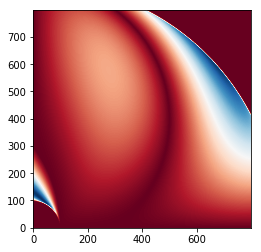

In [93]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

fig, ax = plt.subplots()
im = ax.imshow(err_2d, interpolation='bilinear', cmap=cm.RdBu,
               origin='lower')

plt.show()
